In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv('C:\\Users\\night\\CSCL 250\\Fun stuff\\Twitch_game_data.csv',encoding='cp1252')
data=pd.DataFrame(data)
data.head(12)

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
5,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88
6,7,World of Warcraft,1,2016,8771452,342978 hours,46130,1180,33375,11805,461,25.57
7,8,Z1: Battle Royale,1,2016,7894571,205569 hours,41588,460,21396,10625,276,38.40
8,9,Talk Shows & Podcasts,1,2016,7688369,53235 hours,84051,148,10779,10347,71,144.42
9,10,FIFA 16,1,2016,6988475,203646 hours,145728,756,46462,9405,274,34.32


In [4]:
data.shape

(14400, 12)

In [5]:
data.isna().sum()

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [6]:
data = data.dropna(subset=['Game'])

In [7]:
data.dtypes

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_Streamed       object
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
dtype: object

In [8]:
print(data["Game"].unique())
print(len(data["Game"].unique()), 'Games')
print()
game_vc = data['Game'].value_counts()

['League of Legends' 'Counter-Strike: Global Offensive' 'Dota 2' ...
 'The Elder Scrolls V: Skyrim Special Edition' 'DNF Duel'
 'Pro Soccer Online']
1799 Games



<BarContainer object of 1799 artists>

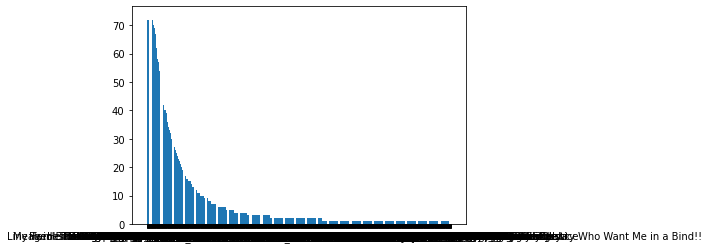

In [9]:
plt.bar(game_vc.keys(),game_vc)

In [62]:
ranking=data[data.Rank==1]
ranking.shape
ranking.ndim

2

In [11]:
top_games=list(ranking.Game.unique())
top_games

['League of Legends',
 "PLAYERUNKNOWN'S BATTLEGROUNDS",
 'Fortnite',
 'Apex Legends',
 'World of Warcraft',
 'Just Chatting',
 'VALORANT']

In [12]:
labels=ranking.Game

In [13]:
frequency = {}

for i in labels:
    if (i in frequency) == True:
        frequency[i] = frequency[i] + 1
    else:
        frequency[i] = 1
print(frequency)

{'League of Legends': 31, "PLAYERUNKNOWN'S BATTLEGROUNDS": 1, 'Fortnite': 16, 'Apex Legends': 1, 'World of Warcraft': 1, 'Just Chatting': 21, 'VALORANT': 1}


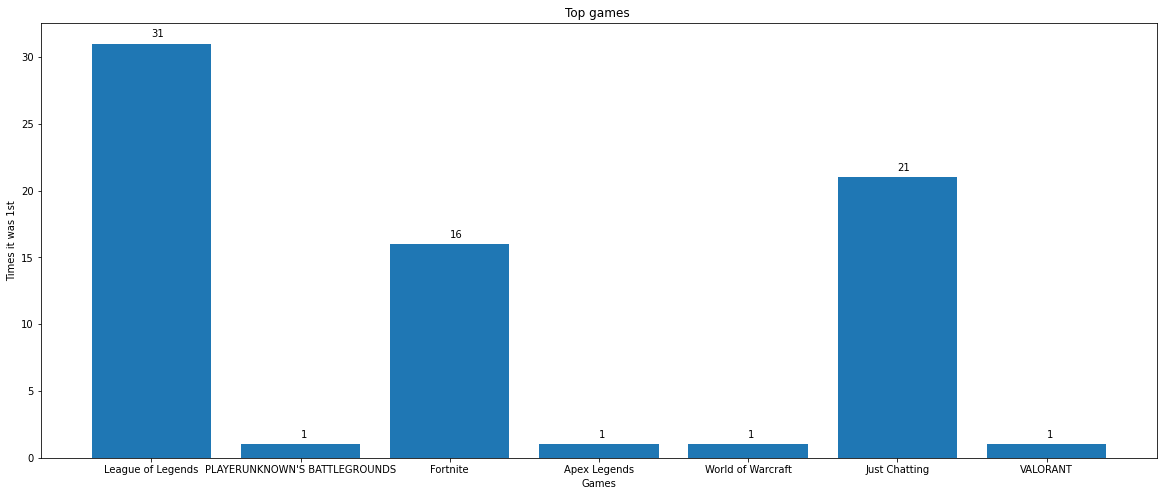

In [14]:
plt.figure(figsize=(20,8))
plt.bar(frequency.keys(), frequency.values())

plt.title("Top games ")

plt.xlabel("Games")
plt.ylabel("Times it was 1st")

list_of_keys = frequency.keys()
for value in list_of_keys:
    plt.text(value, frequency[value]+0.5, (frequency[value]))

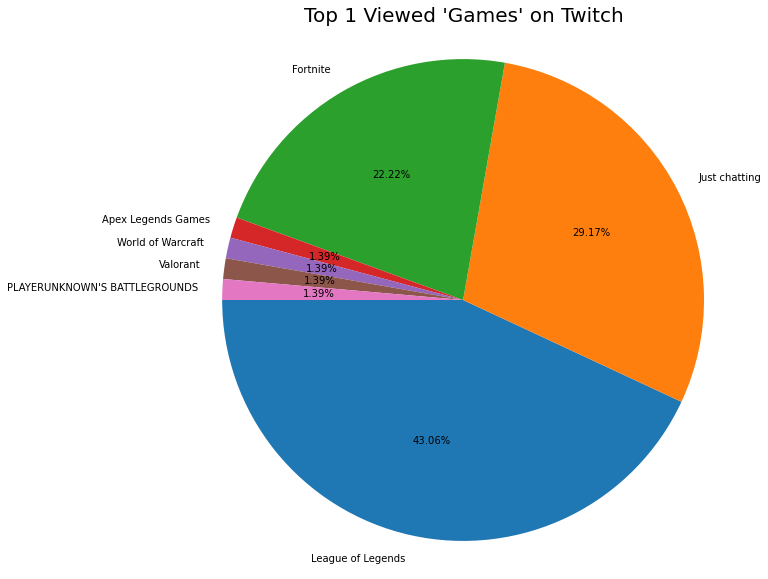

In [15]:
labels = 'League of Legends','Just chatting' , 'Fortnite' , 'Apex Legends Games', 'World of Warcraft','Valorant',"PLAYERUNKNOWN'S BATTLEGROUNDS" #We can't include 'Bar' and 'Can' because they only appear once in our data.
size = [31,21,16,1,1,1,1]

f, ax = plt.subplots(1,1, figsize= (10,10))

ax.pie(size, labels = labels, autopct = '%1.2f%%', startangle = 180)
ax.axis('equal')
ax.set_title("Top 1 Viewed 'Games' on Twitch", size = 20)

plt.show()

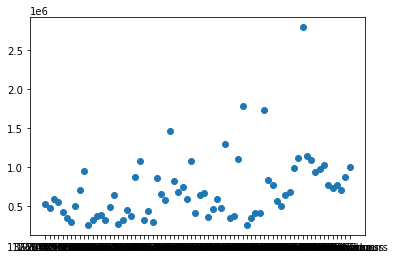

In [58]:
plt.scatter(ranking['Hours_Streamed'],ranking['Peak_viewers'])

In [16]:
top_five=data[data.Rank<=5]
top_five

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
14200,1,Just Chatting,12,2021,271538951,3116407 hours,1006556,8092,396024,365462,4194,87.13
14201,2,Grand Theft Auto V,12,2021,117017755,1944400 hours,415255,5737,148924,157493,2616,60.18
14202,3,VALORANT,12,2021,98306478,2812461 hours,1047665,6019,249067,132310,3785,34.95
14203,4,League of Legends,12,2021,95180552,2465988 hours,591381,5291,194521,128103,3318,38.60


In [17]:
print(top_five["Game"].unique())
print(len(top_five["Game"].unique()), 'games')
print()
top_five_vc = top_five['Game'].value_counts()

['League of Legends' 'Counter-Strike: Global Offensive' 'Dota 2'
 'Hearthstone' 'Call of Duty: Black Ops III' "Tom Clancy's The Division"
 'Dark Souls III' 'Overwatch' 'World of Warcraft'
 "PLAYERUNKNOWN'S BATTLEGROUNDS" 'Fortnite' 'IRL'
 'Call of Duty: Black Ops 4' 'Just Chatting' 'Apex Legends'
 'Grand Theft Auto V' 'Teamfight Tactics' 'Escape From Tarkov'
 'Call of Duty: Warzone' 'VALORANT' 'Fall Guys: Ultimate Knockout'
 'Among Us' 'Minecraft' 'Rust' 'New World' 'Escape from Tarkov']
26 games



<BarContainer object of 26 artists>

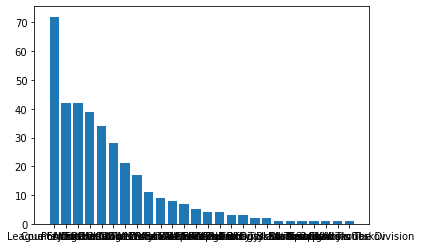

In [18]:
plt.bar(top_five_vc.keys(),top_five_vc)

In [19]:
top_five=pd.DataFrame(top_five_vc)
top_five.reset_index(inplace=True)
top_five= top_five.rename(columns = {'index':'Games'})


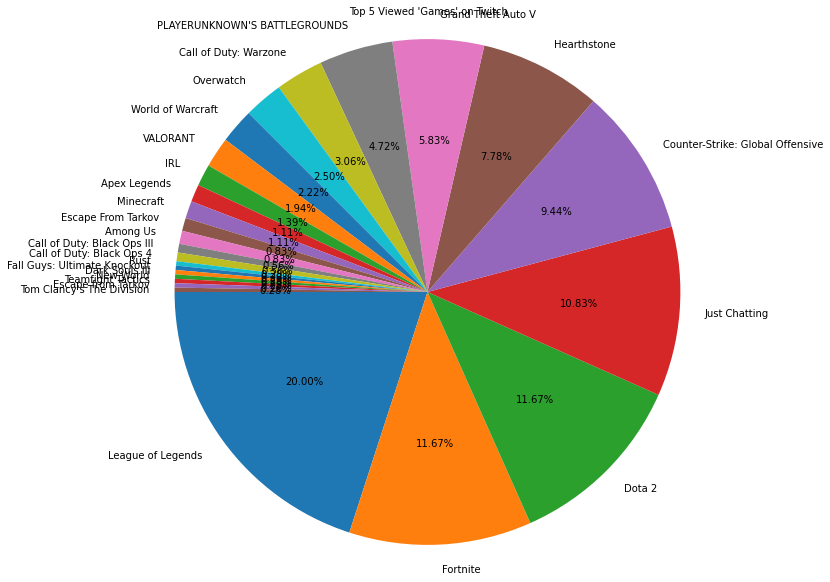

In [20]:
f, ax = plt.subplots(1,1, figsize= (5,5))

ax.pie(top_five["Game"], labels = top_five["Games"], autopct = '%1.2f%%', startangle = 180)
ax.axis('equal')
ax.set_title("Top 5 Viewed 'Games' on Twitch", size = 10)

plt.show()

In [55]:
top_three=data[data.Rank<=3]
top_three

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
200,1,League of Legends,2,2016,93154772,1266715 hours,475784,2712,117996,134035,1822,73.54
201,2,Counter-Strike: Global Offensive,2,2016,44933218,754901 hours,235027,2097,106074,64652,1086,59.52
...,...,...,...,...,...,...,...,...,...,...,...,...
14001,2,Grand Theft Auto V,11,2021,129608680,1752977 hours,442304,5022,123262,180262,2438,73.94
14002,3,League of Legends,11,2021,102612188,2420283 hours,3082772,5280,192692,142715,3366,42.40
14200,1,Just Chatting,12,2021,271538951,3116407 hours,1006556,8092,396024,365462,4194,87.13
14201,2,Grand Theft Auto V,12,2021,117017755,1944400 hours,415255,5737,148924,157493,2616,60.18


In [56]:
print(top_three["Game"].unique())
print(len(top_three["Game"].unique()), 'games')
print()
top_three_vc = top_three['Game'].value_counts()

['League of Legends' 'Counter-Strike: Global Offensive' 'Dota 2'
 'Hearthstone' "PLAYERUNKNOWN'S BATTLEGROUNDS" 'Fortnite' 'IRL'
 'Call of Duty: Black Ops 4' 'Just Chatting' 'Apex Legends'
 'Grand Theft Auto V' 'Teamfight Tactics' 'World of Warcraft'
 'Escape From Tarkov' 'Call of Duty: Warzone' 'VALORANT'
 'Fall Guys: Ultimate Knockout' 'Among Us' 'Rust']
19 games



In [28]:
lol=data[data.Game=="League of Legends"]
lol

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
200,1,League of Legends,2,2016,93154772,1266715 hours,475784,2712,117996,134035,1822,73.54
400,1,League of Legends,3,2016,94514511,1264029 hours,599114,2585,117734,127206,1701,74.77
600,1,League of Legends,4,2016,88389049,1217250 hours,553165,2945,113251,122933,1692,72.61
800,1,League of Legends,5,2016,80679320,1196096 hours,433005,2635,118593,108585,1609,67.45
...,...,...,...,...,...,...,...,...,...,...,...,...
13402,3,League of Legends,8,2021,138132735,2964379 hours,931796,5614,215239,185912,3989,46.60
13602,3,League of Legends,9,2021,107406590,2723708 hours,618086,5548,201351,149383,3788,39.43
13801,2,League of Legends,10,2021,208574800,2489811 hours,2364918,5375,185819,280719,3351,83.77
14002,3,League of Legends,11,2021,102612188,2420283 hours,3082772,5280,192692,142715,3366,42.40


In [1]:
len(lol['month'])

NameError: name 'lol' is not defined

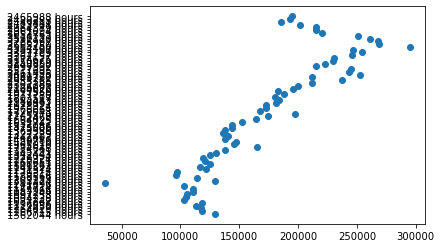

In [54]:
plt.scatter(lol['Streamers'],lol['Hours_Streamed'])

<BarContainer object of 72 artists>

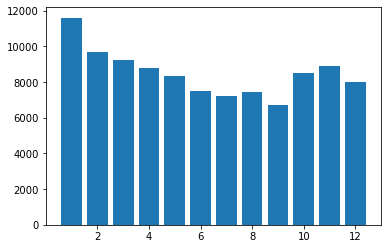

In [47]:
plt.bar(lol['Month'],lol['Peak_channels'])

<BarContainer object of 72 artists>

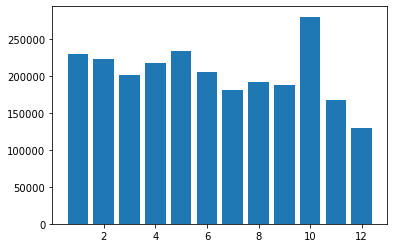

In [33]:
plt.bar(lol['Month'],lol['Avg_viewers'])

In [34]:
year_lol=lol.groupby(["Year"])
year_lol

In [36]:
year_list=list(lol.Year.unique())

In [39]:
average_viewers=[]

for i in year_list:
    x=lol[lol.Year==i]
    year_average=sum(x.Avg_viewers)/len(x)
    average_viewers.append(year_average)

average_viewers

[118083.41666666667,
 117081.5,
 112639.33333333333,
 127911.66666666667,
 177187.0,
 198402.16666666666]

In [40]:
avg_lol=pd.DataFrame({'year_list':year_list,'average_viewers':average_viewers})

<BarContainer object of 6 artists>

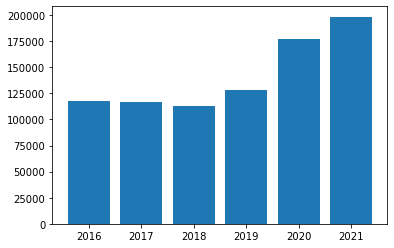

In [41]:
plt.bar(year_list,average_viewers)

In [24]:
#year_lol=year_lol[["Avg_viewers"]].agg([np.mean,np.std])
#

Avg_viewers              
               mean           std
Year                             
2016  118083.416667  11782.676285
2017  117081.500000  15326.083800
2018  112639.333333  13442.694564
2019  127911.666667  20735.347393
2020  177187.000000  27302.843455
2021  198402.166667  43757.164851